In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2017-01-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2017_1q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-01-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6900     Î∂ÅÍµ¨   7425     Î∂ÅÍµ¨   
1   2017-01-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   4750     Î∂ÅÍµ¨   6250     Î∂ÅÍµ¨   
2   2017-01-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2300     Î∂ÅÍµ¨   4750     Î∂ÅÍµ¨   
3   2017-01-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3680     Î∂ÅÍµ¨   4200     Î∂ÅÍµ¨   
4   2017-01-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6800     Î∂ÅÍµ¨   7520     Î∂ÅÍµ¨   
5   2017-01-12     ÎåÄÌåå                      1.0„éè   2980     Î∂ÅÍµ¨   4685     Î∂ÅÍµ¨   
6   2017-01-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9100     Î∂ÅÍµ¨   9900     Î∂ÅÍµ¨   
7   2017-01-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3580     Î∂ÅÍµ¨   4365     Î∂ÅÍµ¨   
8   2017-01-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
9   2017-01-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1330     Î∂ÅÍµ¨   1380     Î∂ÅÍµ¨   
10  2017-01-12      Î¨¥                   2.0„éè 1Í∞ú   2380     Î∂ÅÍµ¨   2519     Î∂ÅÍµ¨   
11  2017-01-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3500     Î∂ÅÍµ¨   4220     Î∂ÅÍµ¨   
12  2017-01-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   2980     Î∂ÅÍµ¨   3280     Î∂ÅÍµ¨   
13  2017-01-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16000     Î∂ÅÍµ¨  30000     Î∂ÅÍµ¨   
14  2017-01-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   3143     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
15  2017-01-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3250     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
16  2017-01-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
17  2017-01-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  14000     Î∂ÅÍµ¨  17688     Î∂ÅÍµ¨   
18  2017-01-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2450     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
19  2017-01-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1590     Î∂ÅÍµ¨   1590     Î∂ÅÍµ¨   
20  2017-01-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1130     Î∂ÅÍµ¨   1140     Î∂ÅÍµ¨   
21  2017-01-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39000     Î∂ÅÍµ¨  39500     Î∂ÅÍµ¨   
22  2017-01-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4980     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
23  2017-01-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  33800     Î∂ÅÍµ¨  46000     Î∂ÅÍµ¨   
24  2017-01-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2230     Î∂ÅÍµ¨   3280     Î∂ÅÍµ¨   
25  2017-01-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     Î∂ÅÍµ¨    780     Î∂ÅÍµ¨   
26  2017-01-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6750     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
27  2017-01-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2390     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
28  2017-01-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380     Î∂ÅÍµ¨   2750     Î∂ÅÍµ¨   
29  2017-01-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13906     Î∂ÅÍµ¨  19560     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     525    7.61%   7,163  
1    1500   31.58%   5,500  
2    2450  106.52%   3,525  
3     520   14.13%   3,940  
4     720   10.59%   7,160  
5    1705   57.21%   3,833  
6     800    8.79%   9,500  
7     785   21.93%   3,973  
8       4    0.59%     678  
9      50    3.76%   1,355  
10    139    5.84%   2,450  
11    720   20.57%   3,860  
12    300   10.07%   3,130  
13  14000    87.5%  23,000  
14    837   26.63%   3,562  
15    250    7.69%   3,375  
16      0     0.0%  13,850  
17   3688   26.34%  15,844  
18      0     0.0%   2,450  
19      0     0.0%   1,590  
20     10    0.88%   1,135  
21    500    1.28%  39,250  
22   1970   39.56%   5,965  
23  12200   36.09%  39,900  
24   1050   47.09%   2,755

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2017-04-13"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2017_2q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-04-13   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7425     Î∂ÅÍµ¨   8900     Î∂ÅÍµ¨   
1   2017-04-13     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6250     Î∂ÅÍµ¨   
2   2017-04-13    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   4200     Î∂ÅÍµ¨   4800     Î∂ÅÍµ¨   
3   2017-04-13     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2980     Î∂ÅÍµ¨   3960     Î∂ÅÍµ¨   
4   2017-04-13    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   7810     Î∂ÅÍµ¨   9028     Î∂ÅÍµ¨   
5   2017-04-13     ÎåÄÌåå                      1.0„éè   2780     Î∂ÅÍµ¨   4685     Î∂ÅÍµ¨   
6   2017-04-13   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   8400     Î∂ÅÍµ¨  10450     Î∂ÅÍµ¨   
7   2017-04-13     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3480     Î∂ÅÍµ¨   4365     Î∂ÅÍµ¨   
8   2017-04-13     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
9   2017-04-13     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
10  2017-04-13      Î¨¥                   2.0„éè 1Í∞ú   1580     Î∂ÅÍµ¨   4759     Î∂ÅÍµ¨   
11  2017-04-13    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
12  2017-04-13      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  16000     Î∂ÅÍµ¨  36994     Î∂ÅÍµ¨   
13  2017-04-13     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2538     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
14  2017-04-13  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3250     Î∂ÅÍµ¨   3500     Î∂ÅÍµ¨   
15  2017-04-13   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850     Î∂ÅÍµ¨  14500     Î∂ÅÍµ¨   
16  2017-04-13     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12000     Î∂ÅÍµ¨  14295     Î∂ÅÍµ¨   
17  2017-04-13    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
18  2017-04-13     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1590     Î∂ÅÍµ¨   1630     Î∂ÅÍµ¨   
19  2017-04-13     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
20  2017-04-13    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  29400     Î∂ÅÍµ¨  40500     Î∂ÅÍµ¨   
21  2017-04-13    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   4950     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
22  2017-04-13      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  27800     Î∂ÅÍµ¨  45000     Î∂ÅÍµ¨   
23  2017-04-13     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   3110     Î∂ÅÍµ¨   3980     Î∂ÅÍµ¨   
24  2017-04-13     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     Î∂ÅÍµ¨    730     Î∂ÅÍµ¨   
25  2017-04-13    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6750     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
26  2017-04-13   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2390     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
27  2017-04-13     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2750     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
28  2017-04-13    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13906     Î∂ÅÍµ¨  19560     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0    1475   19.87%   8,163  
1    1050   20.19%   5,725  
2     600   14.29%   4,500  
3     980   32.89%   3,470  
4    1218    15.6%   8,419  
5    1905   68.53%   3,733  
6    2050    24.4%   9,425  
7     885   25.43%   3,923  
8       4    0.59%     678  
9      50    3.55%   1,435  
10   3179   201.2%   3,170  
11     70    2.04%   3,465  
12  20994  131.21%  26,497  
13   1442   56.82%   3,259  
14    250    7.69%   3,375  
15    650    4.69%  14,175  
16   2295   19.12%  13,148  
17    134    5.79%   2,383  
18     40    2.52%   1,610  
19     10    0.84%   1,195  
20  11100   37.76%  34,950  
21   2000    40.4%   5,950  
22  17200   61.87%  36,400  
23    870   27.97%   3,545  
24      0     0.0%     730  
25    230    3.41%   6,865  
26     60    2.51%   2,420  
27    230    8.36%   2,865  
28   56

In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2017-07-06"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2017_3q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-07-06   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   7900     Î∂ÅÍµ¨   8175     Î∂ÅÍµ¨   
1   2017-07-06     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   5200     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2017-07-06    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   3375     Î∂ÅÍµ¨   3900     Î∂ÅÍµ¨   
3   2017-07-06     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   3420     Î∂ÅÍµ¨   3480     Î∂ÅÍµ¨   
4   2017-07-06    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   6620     Î∂ÅÍµ¨   8480     Î∂ÅÍµ¨   
5   2017-07-06     ÎåÄÌåå                      1.0„éè   1580     Î∂ÅÍµ¨   2828     Î∂ÅÍµ¨   
6   2017-07-06   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g  11400     Î∂ÅÍµ¨  11800     Î∂ÅÍµ¨   
7   2017-07-06     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3780     Î∂ÅÍµ¨   4365     Î∂ÅÍµ¨   
8   2017-07-06     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
9   2017-07-06     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1380     Î∂ÅÍµ¨   1410     Î∂ÅÍµ¨   
10  2017-07-06      Î¨¥                   2.0„éè 1Í∞ú   1280     Î∂ÅÍµ¨   1480     Î∂ÅÍµ¨   
11  2017-07-06    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3430     Î∂ÅÍµ¨   
12  2017-07-06     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   7500     Î∂ÅÍµ¨  10900     Î∂ÅÍµ¨   
13  2017-07-06      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  15000     Î∂ÅÍµ¨  40103     Î∂ÅÍµ¨   
14  2017-07-06     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   2048     Î∂ÅÍµ¨   2980     Î∂ÅÍµ¨   
15  2017-07-06  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   3500     Î∂ÅÍµ¨   4410     Î∂ÅÍµ¨   
16  2017-07-06   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13850     Î∂ÅÍµ¨  14500     Î∂ÅÍµ¨   
17  2017-07-06     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  12000     Î∂ÅÍµ¨  15812     Î∂ÅÍµ¨   
18  2017-07-06    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
19  2017-07-06     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1650     Î∂ÅÍµ¨   
20  2017-07-06     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
21  2017-07-06    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39000     Î∂ÅÍµ¨  40500     Î∂ÅÍµ¨   
22  2017-07-06    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     Î∂ÅÍµ¨   6950     Î∂ÅÍµ¨   
23  2017-07-06      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  28800     Î∂ÅÍµ¨  45000     Î∂ÅÍµ¨   
24  2017-07-06     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   1920     Î∂ÅÍµ¨   2880     Î∂ÅÍµ¨   
25  2017-07-06     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     Î∂ÅÍµ¨    730     Î∂ÅÍµ¨   
26  2017-07-06    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6750     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
27  2017-07-06   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2390     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
28  2017-07-06     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380     Î∂ÅÍµ¨   2750     Î∂ÅÍµ¨   
29  2017-07-06    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  12040     Î∂ÅÍµ¨  19560     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥  Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     275    3.48%   8,038  
1    1150   22.12%   5,775  
2     525   15.56%   3,638  
3      60    1.75%   3,450  
4    1860    28.1%   7,550  
5    1248   78.99%   2,204  
6     400    3.51%  11,600  
7     585   15.48%   4,073  
8       4    0.59%     678  
9      30    2.17%   1,395  
10    200   15.62%   1,380  
11      0     0.0%   3,430  
12   3400   45.33%   9,200  
13  25103  167.35%  27,552  
14    932   45.51%   2,514  
15    910    26.0%   3,955  
16    650    4.69%  14,175  
17   3812   31.77%  13,906  
18    134    5.79%   2,383  
19     70    4.43%   1,615  
20     10    0.84%   1,195  
21   1500    3.85%  39,750  
22      0     0.0%   6,950  
23  16200   56.25%  36,900  
24    960    50.0%   2,400

In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# ÏßÄÏó≠ Ïù¥Î¶ÑÍ≥º ÏΩîÎìú ÏÑ§Ï†ï
region_name = "Î∂ÅÍµ¨"
region_code = "10"
target_date = "2017-10-12"  # ÎÇ†Ïßú Ïó¥Ïóê Îì§Ïñ¥Í∞à ÎÇ†Ïßú

# ÏöîÏ≤≠ URL Î∞è ÌååÎùºÎØ∏ÌÑ∞
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# ÏöîÏ≤≠ Î≥¥ÎÇ¥Í∏∞
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML ÌååÏã±
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# Í≤∞Í≥º Ï†ÄÏû• Î¶¨Ïä§Ìä∏
result = []

# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList ÌÖåÏù¥Î∏îÏùÑ Ï∞æÏùÑ Ïàò ÏóÜÏäµÎãàÎã§.")

# DataFrame ÏÉùÏÑ± Î∞è Ïó¥ ÏßÄÏ†ï
columns = ["ÎÇ†Ïßú", "ÌíàÎ™©", "Í∑úÍ≤©", "ÏµúÏ†ÄÍ∞Ä", "ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠", "ÏµúÍ≥†Í∞Ä", "ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠", "Í∞ÄÍ≤©Ï∞®Ïù¥", "Ï∞®Ïù¥ÎπÑÏú®(%)", "Í∏àÏ£ºÌèâÍ∑†Í∞Ä"]
df = pd.DataFrame(result, columns=columns)

# Ìëú ÌòïÌÉúÎ°ú Ï∂úÎ†• (JupyterLab)
display(df)

df.to_csv("Î∂ÅÍµ¨2017_4q.csv", index=False, encoding="utf-8-sig")


ÎÇ†Ïßú     ÌíàÎ™©                        Í∑úÍ≤©    ÏµúÏ†ÄÍ∞Ä ÏµúÏ†ÄÍ∞Ä_ÏßÄÏó≠    ÏµúÍ≥†Í∞Ä ÏµúÍ≥†Í∞Ä_ÏßÄÏó≠  \
0   2017-10-12   Í∞ÄÎ£®ÎπÑÎàÑ     ÏÑ∏ÌÉÅÏö©ÏÑ∏Ï†ú(LGÌÖåÌÅ¨),Í∞ÄÎ£®Ìòï,3.0kg   6540     Î∂ÅÍµ¨   6900     Î∂ÅÍµ¨   
1   2017-10-12     Í∞ÑÏû•              Ïò§Î≥µÏôïÌëú 0.9‚Ñì 1Î≥ë   4580     Î∂ÅÍµ¨   6350     Î∂ÅÍµ¨   
2   2017-10-12    Í≥†Îì±Ïñ¥            30„éùÏ†ïÎèÑ 500g 1ÎßàÎ¶¨   2437     Î∂ÅÍµ¨   2500     Î∂ÅÍµ¨   
3   2017-10-12     Îã¨Í±Ä            Ïò§Í≤ΩÏäàÌçºÎûÄ60gÏ†ïÎèÑ 10Í∞ú   2780     Î∂ÅÍµ¨   3000     Î∂ÅÍµ¨   
4   2017-10-12    Îã≠Í≥†Í∏∞                   Ïú°Í≥Ñ 1.0„éè   5950     Î∂ÅÍµ¨   8500     Î∂ÅÍµ¨   
5   2017-10-12     ÎåÄÌåå                      1.0„éè   2780     Î∂ÅÍµ¨   3780     Î∂ÅÍµ¨   
6   2017-10-12   ÎèºÏßÄÍ≥†Í∏∞                  ÏÇºÍ≤πÏÇ¥ 500g   9900     Î∂ÅÍµ¨  11400     Î∂ÅÍµ¨   
7   2017-10-12     ÎëêÎ∂Ä  500g ÌåêÎëêÎ∂Ä(Íµ≠ÏÇ∞Ìè¨Ïû•ÎëêÎ∂Ä 420g) 1Î™®   3780     Î∂ÅÍµ¨   4365     Î∂ÅÍµ¨   
8   2017-10-12     ÎùºÎ©¥              Ïã†ÎùºÎ©¥ 120g 1Î¥âÏßÄ    676     Î∂ÅÍµ¨    680     Î∂ÅÍµ¨   
9   2017-10-12     Îß•Ï£º               ÌïòÏù¥Ìä∏ 500„éñ 1Î≥ë   1410     Î∂ÅÍµ¨   1460     Î∂ÅÍµ¨   
10  2017-10-12      Î¨¥                   2.0„éè 1Í∞ú   1980     Î∂ÅÍµ¨   2084     Î∂ÅÍµ¨   
11  2017-10-12    Î∞ÄÍ∞ÄÎ£®             Î∞±ÏÑ§Ìëú Ï§ëÎ†•Î∂Ñ1Îì±2.5„éè   3430     Î∂ÅÍµ¨   3430     Î∂ÅÍµ¨   
12  2017-10-12     Î∞ÄÍ∞ê                100g Ï†ïÎèÑ10Í∞ú   5980     Î∂ÅÍµ¨   5990     Î∂ÅÍµ¨   
13  2017-10-12      Î∞∞            600g Ï†ïÎèÑ Ïã†Í≥† 10Í∞ú  14134     Î∂ÅÍµ¨  20000     Î∂ÅÍµ¨   
14  2017-10-12     Î∞∞Ï∂î                  2.0„éè 1Ìè¨Í∏∞   4980     Î∂ÅÍµ¨   5960     Î∂ÅÍµ¨   
15  2017-10-12  Î∂ÄÏóåÏö©ÏÑ∏Ï†ú              Ï∞∏Í∑∏Î¶∞1.4„éè1Î¥âÎ¶¨ÌïÑÏö©   4024     Î∂ÅÍµ¨   4410     Î∂ÅÍµ¨   
16  2017-10-12   Î∂ÑÎßêÏª§Ìîº     Îß•Ïã¨ Ïä§Ìã±(Ïª§ÌîºÎØπÏä§) Î™®Ïπ¥Í≥®Îìú 100T  13780     Î∂ÅÍµ¨  13850     Î∂ÅÍµ¨   
17  2017-10-12     ÏÇ¨Í≥º             300gÏ†ïÎèÑ Î∂ÄÏÇ¨ 10Í∞ú  16182     Î∂ÅÍµ¨  17000     Î∂ÅÍµ¨   
18  2017-10-12    ÏÇ¨Ïù¥Îã§              Ïπ†ÏÑ± PETÎ≥ë 1.5‚Ñì   2316     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
19  2017-10-12     ÏÑ§ÌÉï                Î∞±ÏÑ§Ìëú Ï†ïÎ∞±Îãπ 1„éè   1580     Î∂ÅÍµ¨   1650     Î∂ÅÍµ¨   
20  2017-10-12     ÏÜåÏ£º              ÏãúÏõêÏÜåÏ£º 360„éñ 1Î≥ë   1190     Î∂ÅÍµ¨   1200     Î∂ÅÍµ¨   
21  2017-10-12    Ïá†Í≥†Í∏∞             ÌïúÏö∞Îì±Ïã¨ 1Îì±Í∏â 500g  39000     Î∂ÅÍµ¨  52500     Î∂ÅÍµ¨   
22  2017-10-12    ÏãùÏö©Ïú†                Î∞±ÏÑ§ÌëúÏΩ©Í∏∞Î¶Ñ1.8‚Ñì   6950     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
23  2017-10-12      ÏåÄ                 Ï†ïÎØ∏Ìè¨Ïû•ÎØ∏ 20„éè  39800     Î∂ÅÍµ¨  40000     Î∂ÅÍµ¨   
24  2017-10-12     ÏñëÌåå                 1.0„éè-ÏûéÏóÜÎäîÍ≤É   2320     Î∂ÅÍµ¨   3580     Î∂ÅÍµ¨   
25  2017-10-12     Ïö∞Ïú†             Î∂ÄÏÇ∞Ïö∞Ïú† 200„éñ Ï¢ÖÏù¥Ìå©    730     Î∂ÅÍµ¨    730     Î∂ÅÍµ¨   
26  2017-10-12    Ï∞∏Í∏∞Î¶Ñ               Ïò§ÎöúÍ∏∞ 320„éñ 1Î≥ë   6750     Î∂ÅÍµ¨   6980     Î∂ÅÍµ¨   
27  2017-10-12   Ïª§ÌîºÌÅ¨Î¶º               ÎèôÏÑú 500g Î¶¨ÌïÑÏö©   2390     Î∂ÅÍµ¨   2450     Î∂ÅÍµ¨   
28  2017-10-12     ÏΩúÎùº            ÏΩîÏπ¥ÏΩúÎùº PETÎ≥ë 1.8‚Ñì   2380     Î∂ÅÍµ¨   2750     Î∂ÅÍµ¨   
29  2017-10-12    ÌôîÏû•ÏßÄ          ÎΩÄÏÇêÌîåÎü¨Ïä§30m√ó30Î°§(3Í≤π)  13906     Î∂ÅÍµ¨  17900     Î∂ÅÍµ¨   

     Í∞ÄÍ≤©Ï∞®Ïù¥ Ï∞®Ïù¥ÎπÑÏú®(%)   Í∏àÏ£ºÌèâÍ∑†Í∞Ä  
0     360    5.5%   6,720  
1    1770  38.65%   5,465  
2      63   2.59%   2,469  
3     220   7.91%   2,890  
4    2550  42.86%   7,225  
5    1000  35.97%   3,280  
6    1500  15.15%  10,650  
7     585  15.48%   4,073  
8       4   0.59%     678  
9      50   3.55%   1,435  
10    104   5.25%   2,032  
11      0    0.0%   3,430  
12     10   0.17%   5,985  
13   5866   41.5%  17,067  
14    980  19.68%   5,470  
15    386   9.59%   4,217  
16     70   0.51%  13,815  
17    818   5.05%  16,591  
18    134   5.79%   2,383  
19     70   4.43%   1,615  
20     10   0.84%   1,195  
21  13500  34.62%  45,750  
22     30   0.43%   6,965  
23    200    0.5%  39,900  
24   1260  54.31%   2,950  
25      0    0.0%     7

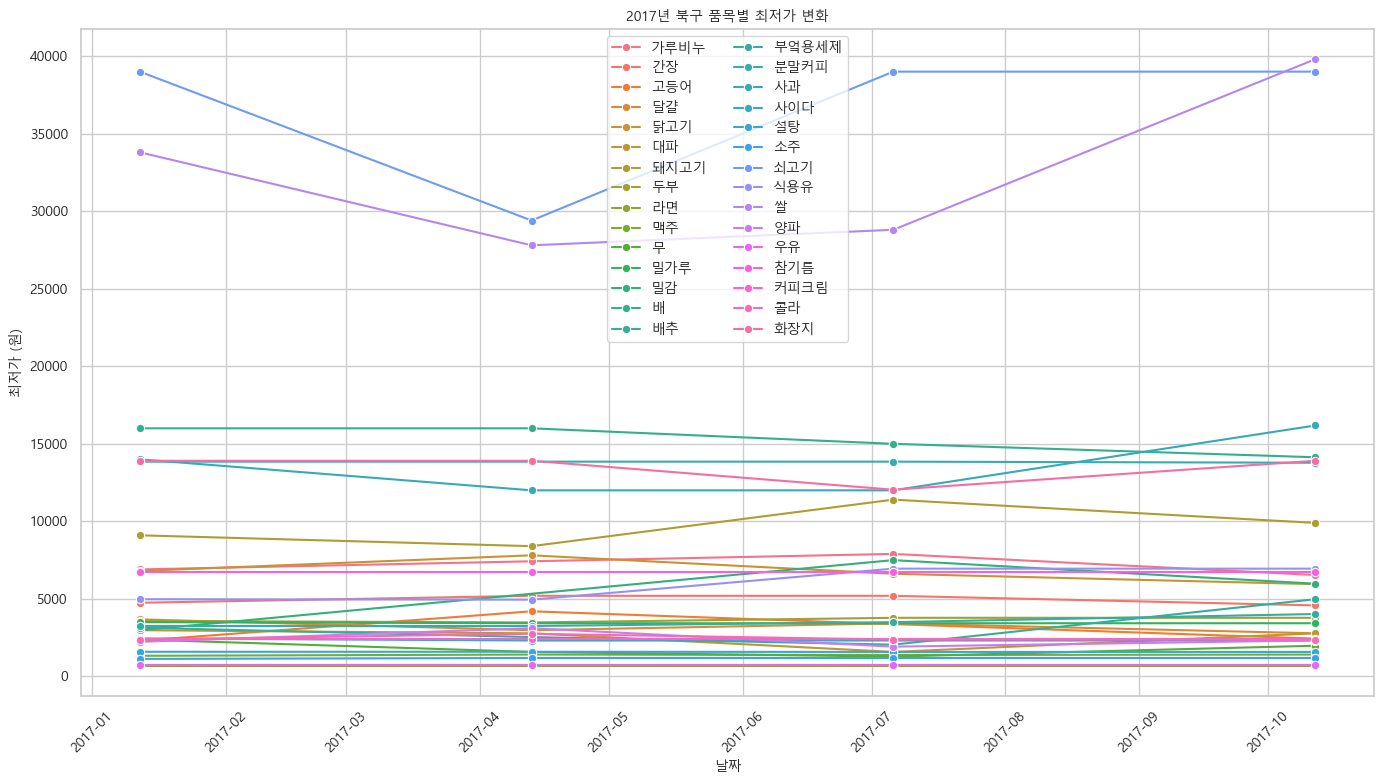

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2017_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2017_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2017_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÏ†ÄÍ∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÏ†ÄÍ∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÏ†ÄÍ∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2017_min.csv", index=False, encoding="utf-8-sig")

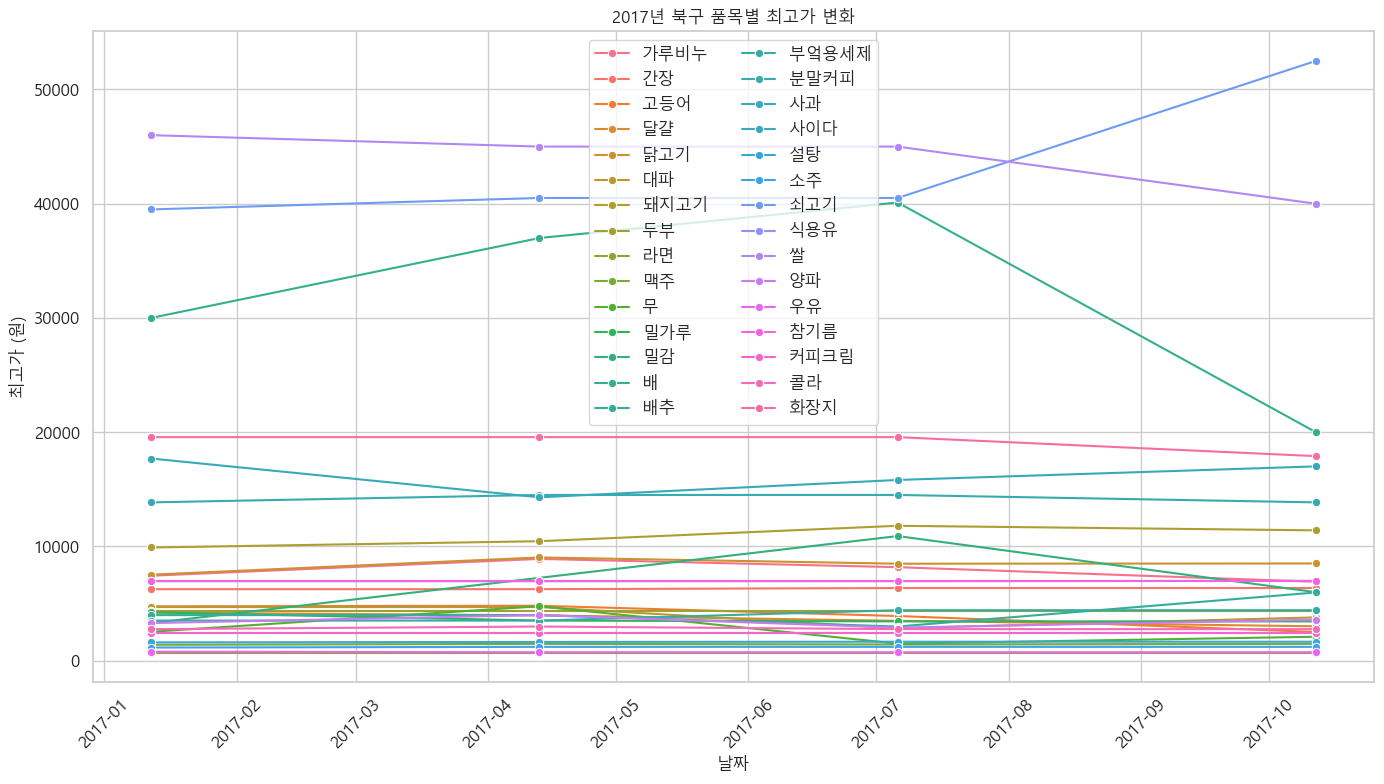

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# üìå Í∞ïÏ†úÎ°ú Ìè∞Ìä∏ ÏßÄÏ†ï
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV ÌååÏùº Î∂àÎü¨Ïò§Í∏∞
q1 = pd.read_csv("Î∂ÅÍµ¨2017_1q.csv")
q2 = pd.read_csv("Î∂ÅÍµ¨2017_2q.csv")
q3 = pd.read_csv("Î∂ÅÍµ¨2017_3q.csv")
q4 = pd.read_csv("Î∂ÅÍµ¨2017_4q.csv")

# ÌïòÎÇòÎ°ú Ìï©ÏπòÍ∏∞
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["ÎÇ†Ïßú"] = pd.to_datetime(df_all["ÎÇ†Ïßú"])

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# ÏÑ†Í∑∏ÎûòÌîÑ
sns.lineplot(data=df_all, x="ÎÇ†Ïßú", y="ÏµúÍ≥†Í∞Ä", hue="ÌíàÎ™©", marker="o")

# Í∑∏ÎûòÌîÑ Íæ∏ÎØ∏Í∏∞ (Ïó¨Í∏∞ÏÑú FontProperties Ï†ÅÏö©!)
plt.title("2017ÎÖÑ Î∂ÅÍµ¨ ÌíàÎ™©Î≥Ñ ÏµúÍ≥†Í∞Ä Î≥ÄÌôî", fontsize=16, fontproperties=font_prop)
plt.xlabel("ÎÇ†Ïßú", fontproperties=font_prop)
plt.ylabel("ÏµúÍ≥†Í∞Ä (Ïõê)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_allÏùÑ Ï†ÄÏû•ÌïòÎäî ÏΩîÎìú
df_all.to_csv("Î∂ÅÍµ¨2017_max.csv", index=False, encoding="utf-8-sig")